In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [30]:
# Load dataset (replace with your actual data loading method)
survey_df = pd.read_csv("../../data/prep_survey_profile.csv", low_memory=False)
survey_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,Local development environments,3-5 years,Python,Never,2-3 years
7795,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,We are exploring ML methods (and may one day p...,"5,000-7,499",$100-$999,Local development environments,1-2 years,Python,Never,1-2 years
7796,25-29,Male,China,I prefer not to answer,Data Engineer,Mid-Large,5-9,"We recently started using ML methods (i.e., mo...","20,000-24,999",$100-$999,Local development environments,1-2 years,Python,Used TPU,1-2 years
7797,25-29,Male,Australia,Bachelor’s degree,Other,Large,5-9,No (we do not use ML methods),"60,000-69,999","$10,000-$99,999",Local development environments,3-5 years,Python,Never,1-2 years


In [31]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7799 entries, 0 to 7798
Data columns (total 15 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                             --------------  ----- 
 0   What is your age (# years)?                                                                                                        7799 non-null   object
 1   What is your gender?                                                                                                               7799 non-null   object
 2   In which country do you currently reside?                                                                                          7799 non-null   object
 3   What is the highest level of formal education that you have attained or plan to attain within

In [32]:
survey_df.describe()

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?
count,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799,7799
unique,11,2,59,7,10,5,7,6,25,6,6,6,4,2,8
top,25-29,Male,India,Master’s degree,Data Scientist,Small,20+,"We recently started using ML methods (i.e., mo...",$0-999,$0 (USD),Local development environments,3-5 years,Python,Never,1-2 years
freq,2011,6779,1534,3750,2874,2226,1866,1873,817,2105,4713,2173,6247,6072,2207


In [33]:
# Check for missing values
survey_df.columns = survey_df.columns.str.strip()
missing_values = survey_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 What is your age (# years)?                                                                                                          0
What is your gender?                                                                                                                 0
In which country do you currently reside?                                                                                            0
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                      0
Select the title most similar to your current role (or most recent title if retired)                                                 0
What is the size of the company where you are employed?                                                                              0
Approximately how many individuals are responsible for data science workloads at your place of business?                             0
Does your current employer incorporate

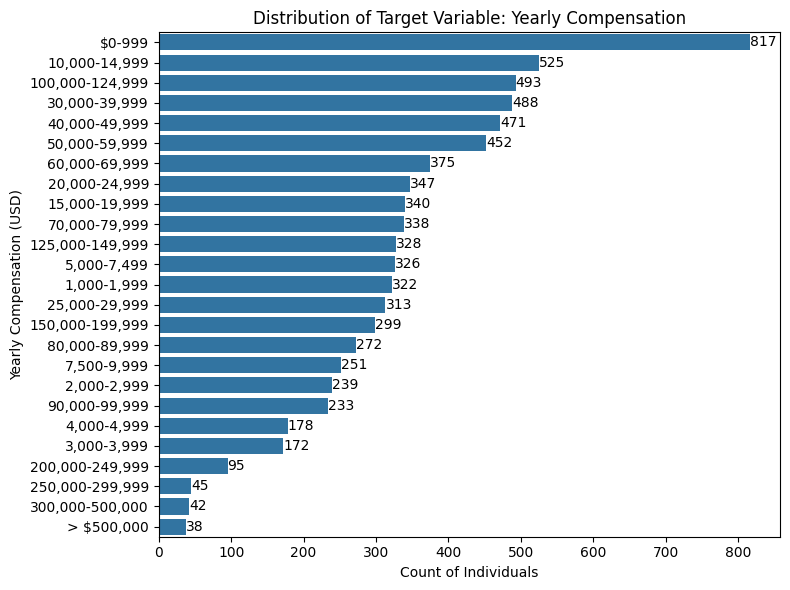

In [34]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    y="What is your current yearly compensation (approximate $USD)?", 
    data=survey_df, 
    order=survey_df["What is your current yearly compensation (approximate $USD)?"].value_counts().index
)

# Add counts above the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Add appropriate labels and title
plt.xlabel("Count of Individuals")
plt.ylabel("Yearly Compensation (USD)")
plt.title("Distribution of Target Variable: Yearly Compensation")
plt.tight_layout()
plt.show()


In [35]:
numerical_features = survey_df.select_dtypes(include=['number']).columns
if not numerical_features.empty:
    print(survey_df[numerical_features].describe())
else:
    print("No numerical features found.")

categorical_features = survey_df.select_dtypes(include=['object']).columns
if not categorical_features.empty:
    for feature in categorical_features:
        print(f"Value counts for {feature}:\n", survey_df[feature].value_counts())
else:
    print("No categorical features found.")


No numerical features found.
Value counts for What is your age (# years)?:
 What is your age (# years)?
25-29    2011
30-34    1576
22-24    1061
35-39    1051
40-44     726
45-49     453
50-54     322
18-21     270
55-59     171
60-69     136
70+        22
Name: count, dtype: int64
Value counts for What is your gender?:
 What is your gender?
Male      6779
Female    1020
Name: count, dtype: int64
Value counts for In which country do you currently reside?:
 In which country do you currently reside?
India                                                   1534
United States of America                                1298
Other                                                    392
Brazil                                                   351
Russia                                                   292
Japan                                                    257
Germany                                                  245
United Kingdom of Great Britain and Northern Ireland     231
Spain   

In [36]:
for feature in categorical_features:
    if feature != "What is your current yearly compensation (approximate $USD)?":
        contingency_table = pd.crosstab(survey_df[feature], survey_df["What is your current yearly compensation (approximate $USD)?"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Test for {feature}: p-value = {p}")

Chi-Square Test for What is your age (# years)?: p-value = 3.9535749910789563e-292
Chi-Square Test for What is your gender?: p-value = 1.0772900392183742e-06
Chi-Square Test for In which country do you currently reside?: p-value = 0.0
Chi-Square Test for What is the highest level of formal education that you have attained or plan to attain within the next 2 years?: p-value = 2.3758878879724846e-56
Chi-Square Test for Select the title most similar to your current role (or most recent title if retired): p-value = 2.240912391885762e-37
Chi-Square Test for What is the size of the company where you are employed?: p-value = 6.356225388779395e-87
Chi-Square Test for Approximately how many individuals are responsible for data science workloads at your place of business?: p-value = 7.01525144038041e-71
Chi-Square Test for Does your current employer incorporate machine learning methods into their business?: p-value = 2.676263508765923e-111
Chi-Square Test for Approximately how much money have yo

                                                    Correlation
How long have you been writing code to analyze ...     0.232107
Approximately how much money have you spent on ...     0.198268
In which country do you currently reside?              0.188190
For how many years have you used machine learni...     0.178053
What is your age (# years)?                            0.154145
Does your current employer incorporate machine ...     0.137362
What is the size of the company where you are e...     0.135703
Approximately how many individuals are responsi...     0.107297
What is the highest level of formal education t...     0.098358
What is the primary tool that you use at work o...     0.084761
What is your gender?                                   0.078469
Select the title most similar to your current r...     0.073670
What programming language would you recommend a...     0.054779
Have you ever used a TPU (tensor processing unit)?     0.051895


C:\Users\Huawei\AppData\Local\Temp\ipykernel_9836\763607093.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index, palette='coolwarm')


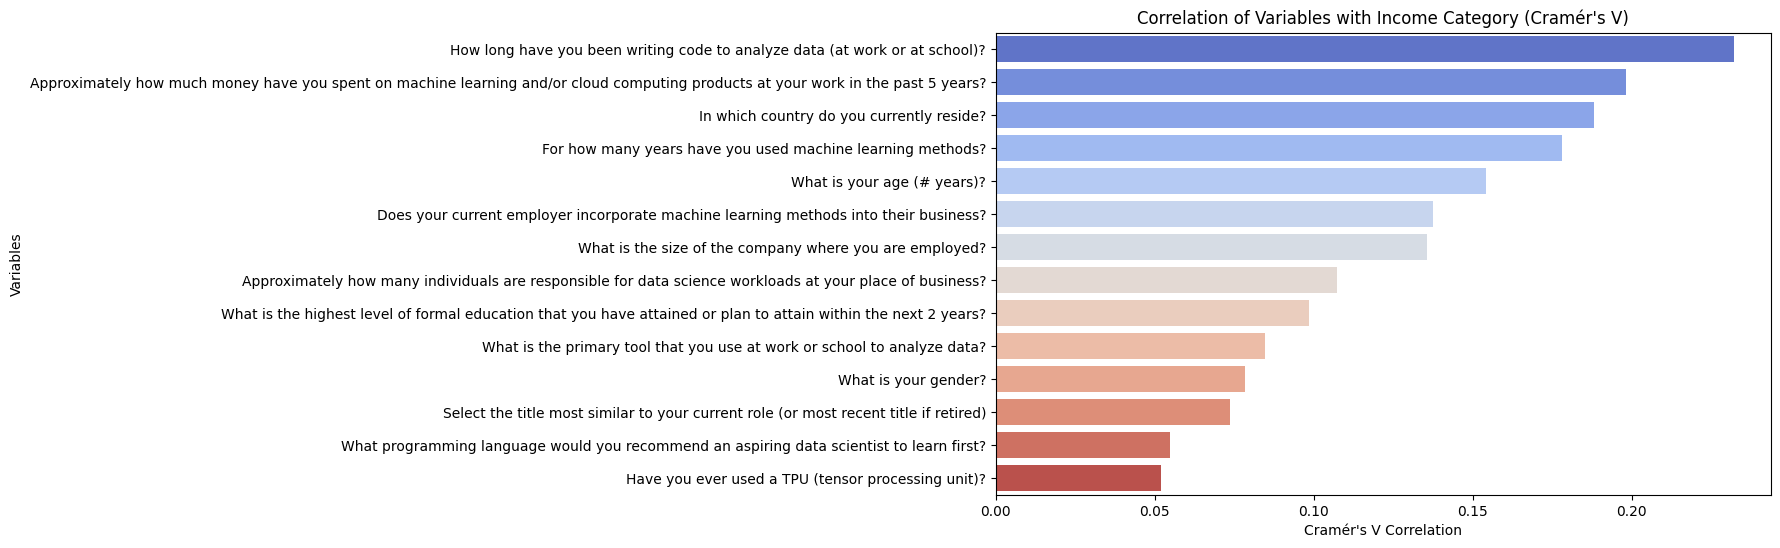

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Cramér's V
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2, _, _, _ = chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Target variable
target_variable = 'What is your current yearly compensation (approximate $USD)?'

# List of categorical columns (excluding the target variable itself)
categorical_columns = survey_df.select_dtypes(include=['object', 'category']).columns.drop(target_variable)

# Calculate correlation of the target variable with other categorical variables
correlations = {}

for col in categorical_columns:
    correlations[col] = cramers_v(survey_df[target_variable], survey_df[col])

# Convert correlations dictionary to a DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']).sort_values(by='Correlation', ascending=False)

# Display the correlation results
print(correlation_df)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index, palette='coolwarm')
plt.title('Correlation of Variables with Income Category (Cramér\'s V)')
plt.xlabel('Cramér\'s V Correlation')
plt.ylabel('Variables')
plt.show()

In [38]:
def categorize_income(value):
    if value in ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999']:
        return 'B40'
    elif value in ['5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999', '20,000-24,999',
                   '25,000-29,999', '30,000-39,999']:
        return 'M40'
    else:
        return 'T20'

# Apply the function to the target column
survey_df['income_category'] = survey_df['What is your current yearly compensation (approximate $USD)?'].apply(categorize_income)

In [39]:
survey_df['What is your current yearly compensation (approximate $USD)?']

0       250,000-299,999
1           4,000-4,999
2         10,000-14,999
3         80,000-89,999
4                $0-999
             ...       
7794        1,000-1,999
7795        5,000-7,499
7796      20,000-24,999
7797      60,000-69,999
7798      60,000-69,999
Name: What is your current yearly compensation (approximate $USD)?, Length: 7799, dtype: object

In [40]:
survey_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,What is the primary tool that you use at work or school to analyze data?,How long have you been writing code to analyze data (at work or at school)?,What programming language would you recommend an aspiring data scientist to learn first?,Have you ever used a TPU (tensor processing unit)?,For how many years have you used machine learning methods?,income_category
0,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,I do not know,"250,000-299,999","$10,000-$99,999",Local development environments,1-2 years,Python,Used TPU,2-3 years,T20
1,22-24,Male,India,Bachelor’s degree,Other,Small,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),Local development environments,< 1 years,Python,Never,< 1 years,B40
2,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,Local development environments,3-5 years,Python,Used TPU,2-3 years,M40
3,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,Enterprise,20+,"We recently started using ML methods (i.e., mo...","80,000-89,999",$0 (USD),Local development environments,3-5 years,Python,Used TPU,3-4 years,T20
4,55-59,Male,Netherlands,Master’s degree,Other,Small,1-2,We are exploring ML methods (and may one day p...,$0-999,$100-$999,Local development environments,5-10 years,Python,Never,< 1 years,B40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7794,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,Local development environments,3-5 years,Python,Never,2-3 years,B40
7795,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,We are exploring ML methods (and may one day p...,"5,000-7,499",$100-$999,Local development environments,1-2 years,Python,Never,1-2 years,M40
7796,25-29,Male,China,I prefer not to answer,Data Engineer,Mid-Large,5-9,"We recently started using ML methods (i.e., mo...","20,000-24,999",$100-$999,Local development environments,1-2 years,Python,Used TPU,1-2 years,M40
7797,25-29,Male,Australia,Bachelor’s degree,Other,Large,5-9,No (we do not use ML methods),"60,000-69,999","$10,000-$99,999",Local development environments,3-5 years,Python,Never,1-2 years,T20


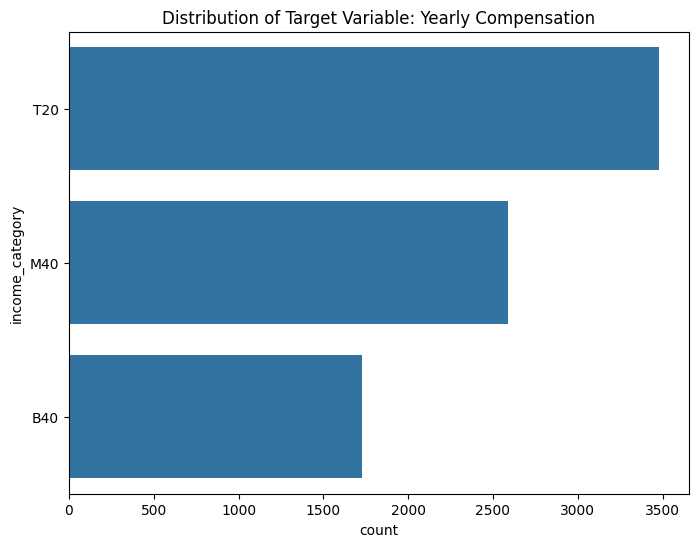

In [41]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y="income_category", data=survey_df, order=survey_df["income_category"].value_counts().index)
plt.title("Distribution of Target Variable: Yearly Compensation")
plt.show()

                                                    Correlation
In which country do you currently reside?              0.493607
How long have you been writing code to analyze ...     0.304941
What is your age (# years)?                            0.280102
For how many years have you used machine learni...     0.270735
Approximately how much money have you spent on ...     0.259089
Does your current employer incorporate machine ...     0.176187
What is the size of the company where you are e...     0.160115
Approximately how many individuals are responsi...     0.146305
What is the highest level of formal education t...     0.129637
Select the title most similar to your current r...     0.124833
What is the primary tool that you use at work o...     0.102810
What is your gender?                                   0.074018
What programming language would you recommend a...     0.056781
Have you ever used a TPU (tensor processing unit)?     0.026769


C:\Users\Huawei\AppData\Local\Temp\ipykernel_9836\963795219.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index, palette='coolwarm')


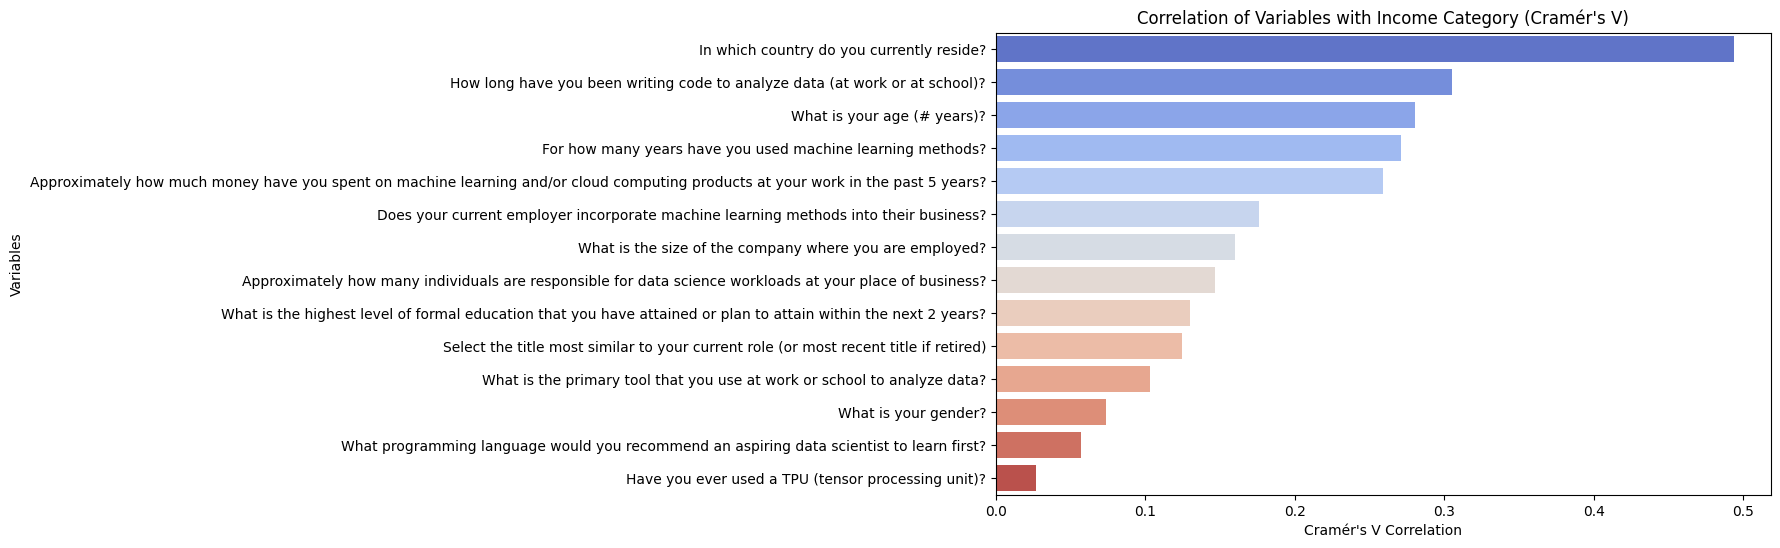

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate Cramér's V
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2, _, _, _ = chi2_contingency(confusion_matrix)
#     n = confusion_matrix.sum().sum()
#     return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Target variable
first_target_variable = 'What is your current yearly compensation (approximate $USD)?'
second_target_variable = 'income_category'


# List of categorical columns (excluding the target variable itself)
categorical_columns = survey_df.select_dtypes(include=['object', 'category']).columns.drop(first_target_variable).drop(second_target_variable)

# Calculate correlation of the target variable with other categorical variables
correlations = {}

for col in categorical_columns:
    correlations[col] = cramers_v(survey_df[second_target_variable], survey_df[col])

# Convert correlations dictionary to a DataFrame for visualization
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']).sort_values(by='Correlation', ascending=False)

# Display the correlation results
print(correlation_df)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index, palette='coolwarm')
plt.title('Correlation of Variables with Income Category (Cramér\'s V)')
plt.xlabel('Cramér\'s V Correlation')
plt.ylabel('Variables')
plt.show()

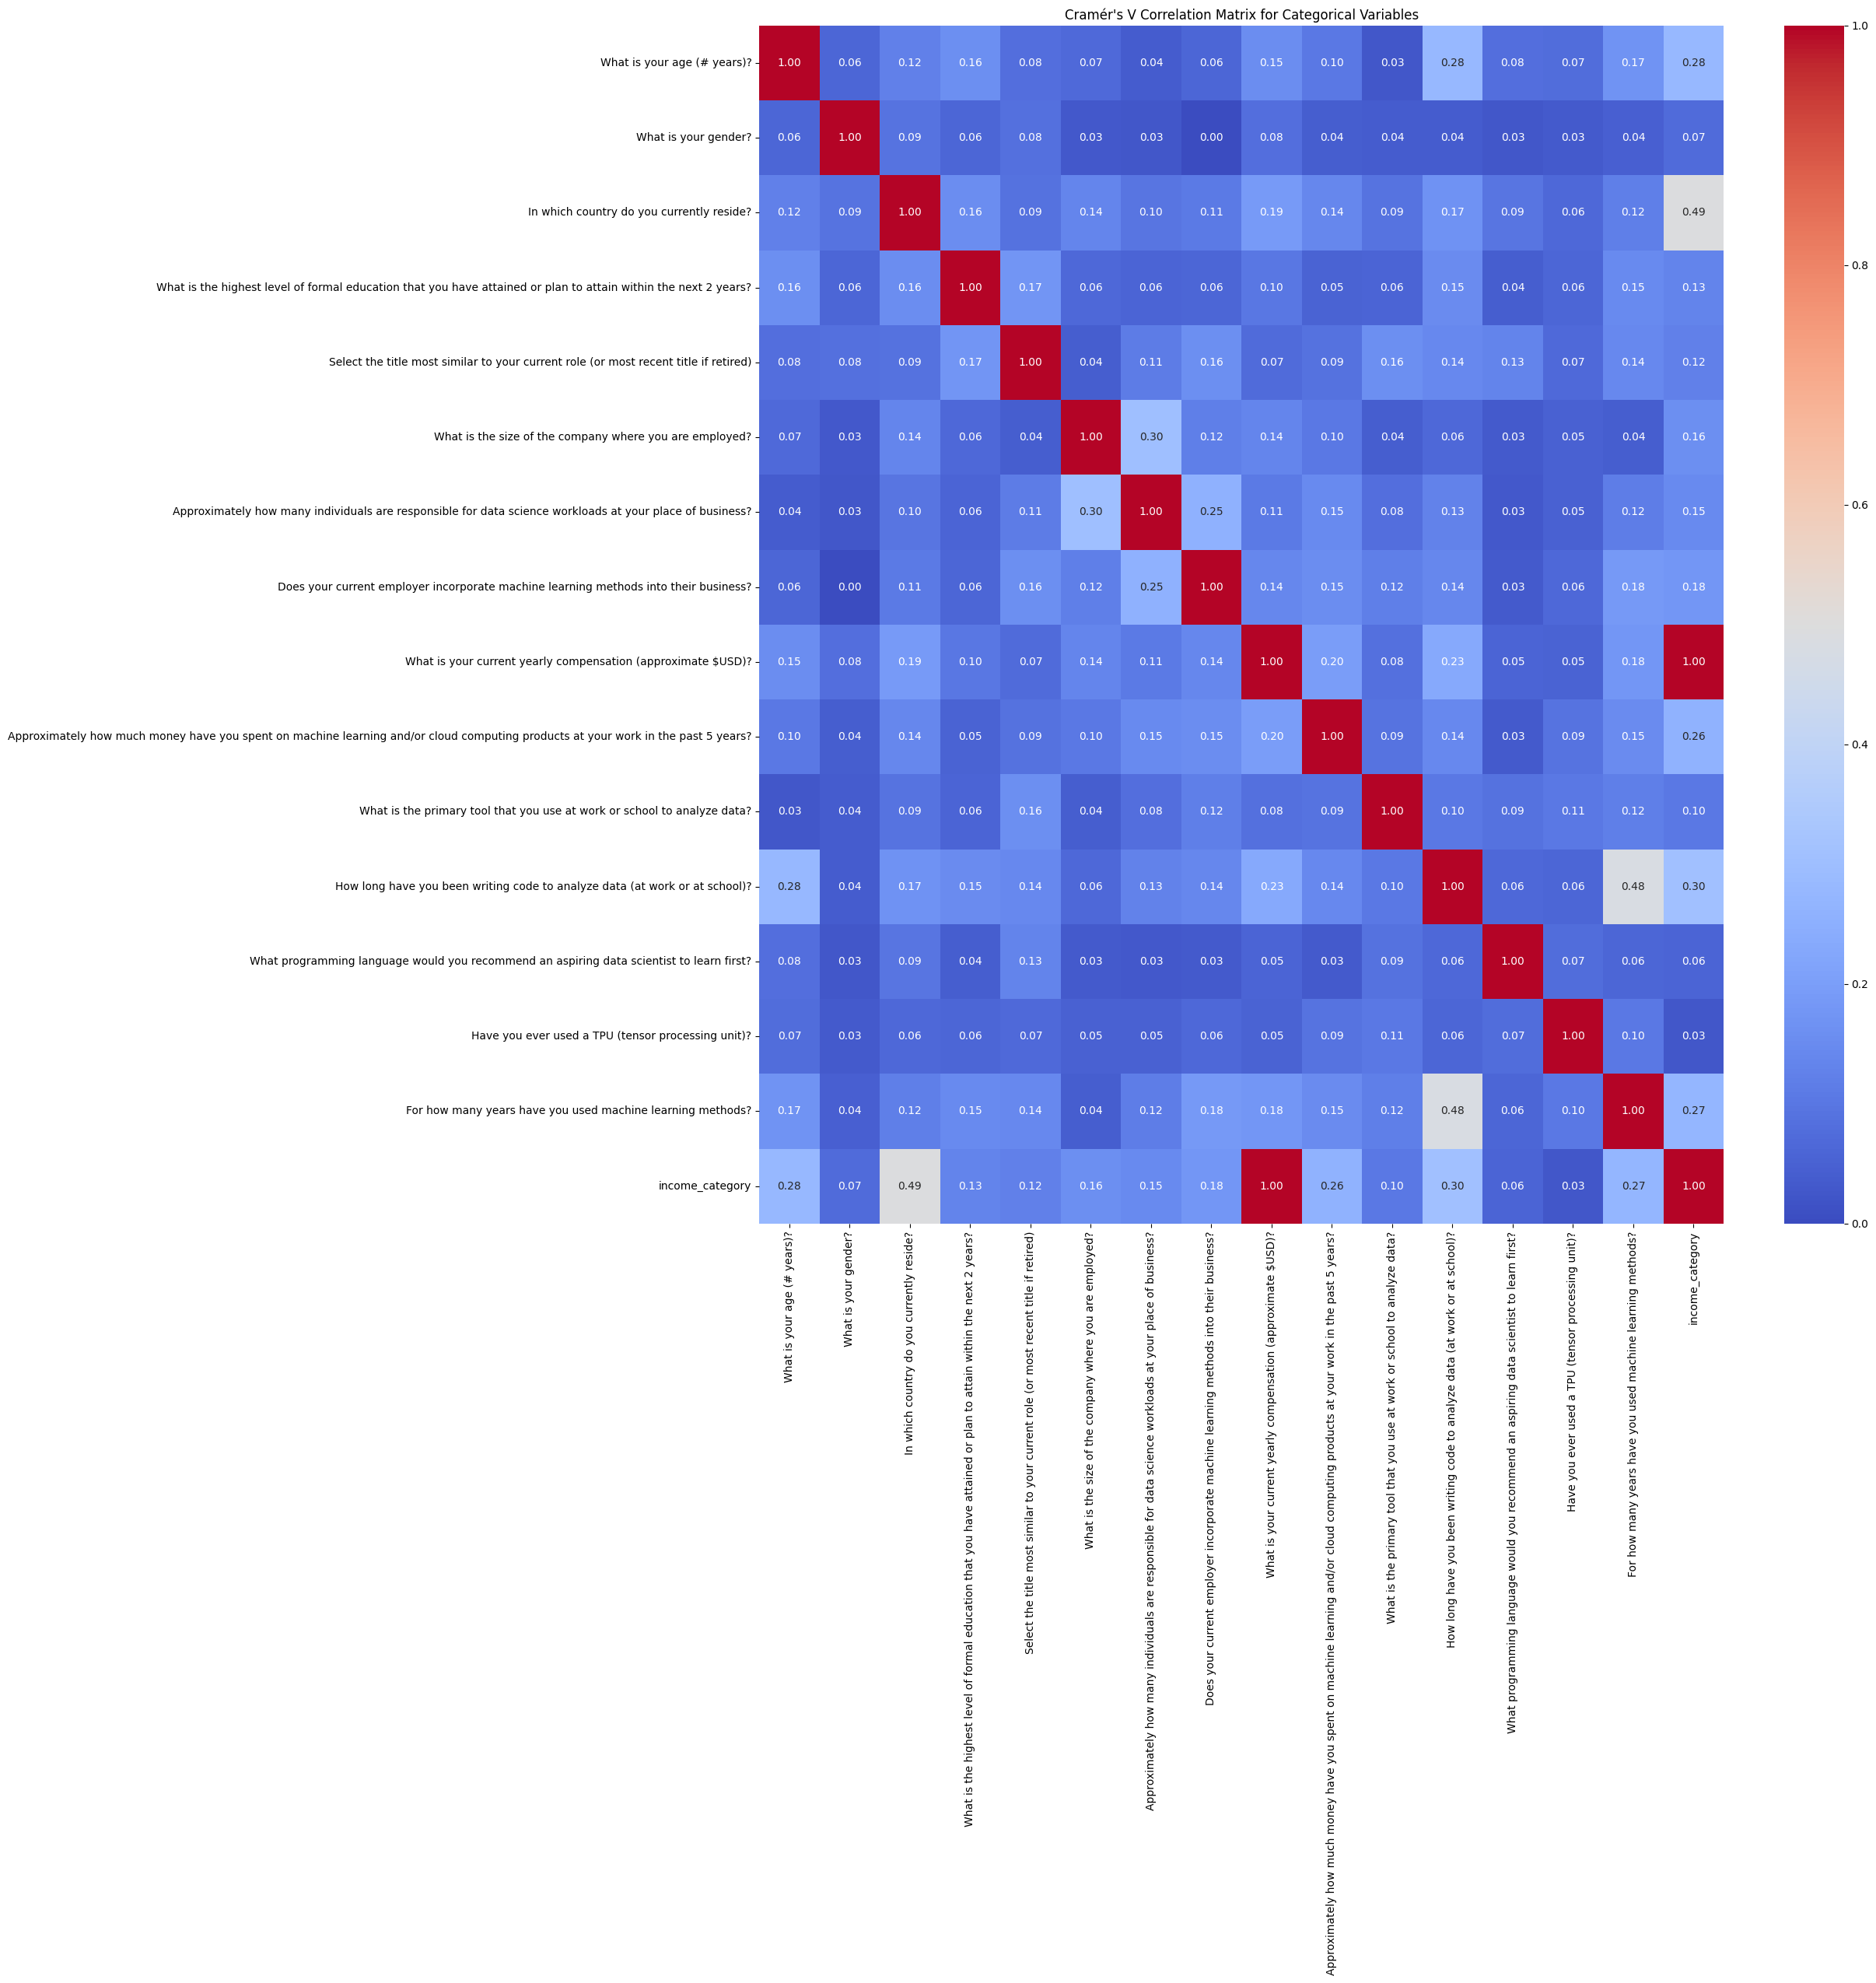

Sorted Cramér's V correlation with 'Income Category':
                                                     income_category
income_category                                            1.000000
What is your current yearly compensation (appro...         0.998588
In which country do you currently reside?                  0.493607
How long have you been writing code to analyze ...         0.304941
What is your age (# years)?                                0.280102
For how many years have you used machine learni...         0.270735
Approximately how much money have you spent on ...         0.259089
Does your current employer incorporate machine ...         0.176187
What is the size of the company where you are e...         0.160115
Approximately how many individuals are responsi...         0.146305
What is the highest level of formal education t...         0.129637
Select the title most similar to your current r...         0.124833
What is the primary tool that you use at work o...         0.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Define Cramér's V function
def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Include all columns (assuming all are categorical features)
df_corr = survey_df.copy()

# Calculate Cramér's V correlation matrix
cramersv = pd.DataFrame(index=df_corr.columns, columns=df_corr.columns)
columns = df_corr.columns

for i in range(len(columns)):
    for j in range(len(columns)):
        cramersv.loc[columns[i], columns[j]] = cramers_v(df_corr[columns[i]], df_corr[columns[j]])

# Convert values to float
cramersv = cramersv.astype(float)

# Visualize the Cramér's V correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cramersv, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

# Isolate correlation with 'income_category' if present
if 'income_category' in cramersv.columns:
    income_only = cramersv[['income_category']].sort_values(by='income_category', ascending=False)
    print("Sorted Cramér's V correlation with 'Income Category':\n", income_only)


<Axes: >

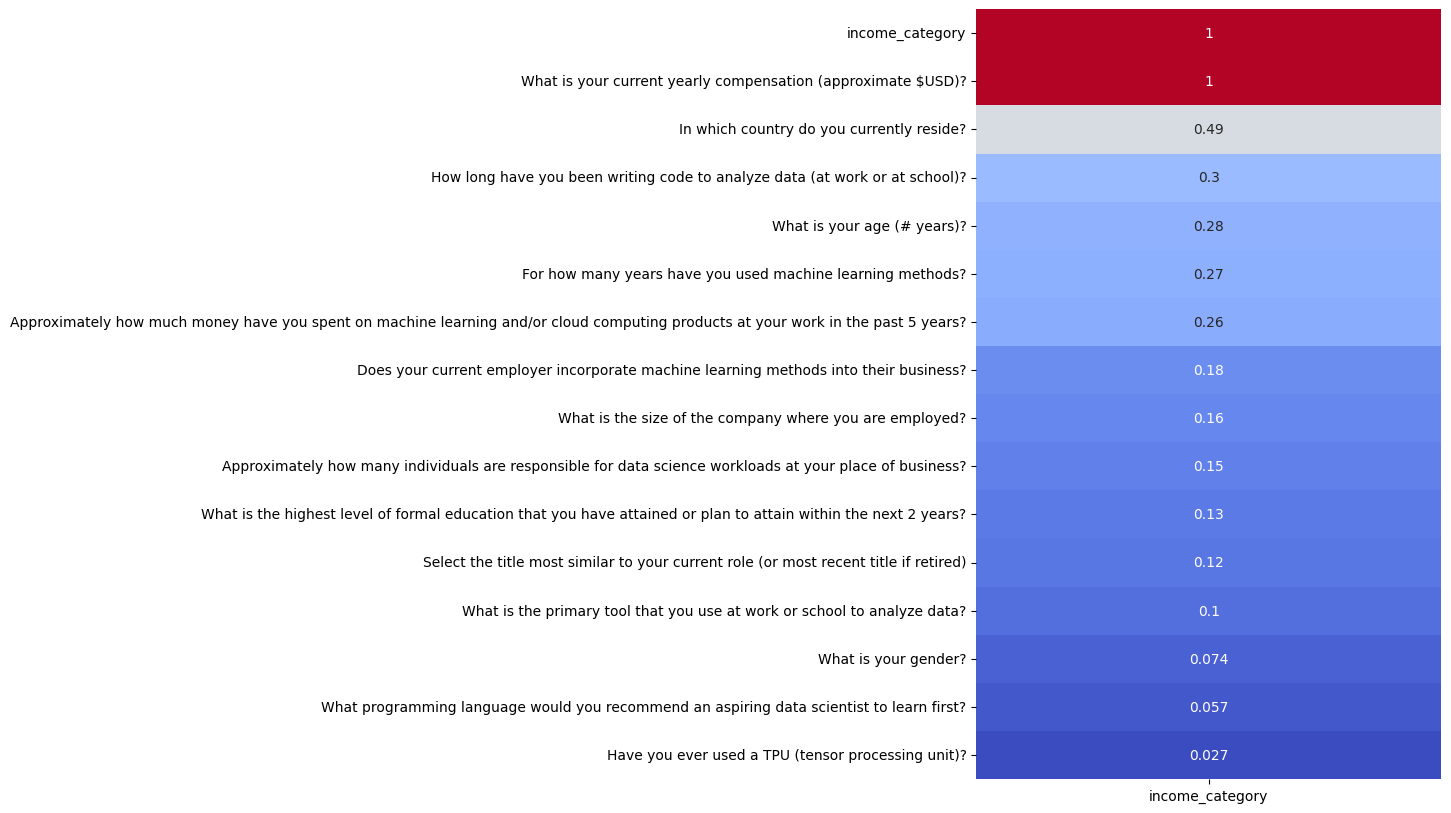

In [44]:
plt.figure(figsize=(6,10))
sns.heatmap(income_only, cmap="coolwarm", annot=True, cbar = False)

In [45]:
# Save to a new CSV
survey_df.to_csv("../../data/final_survey_table.csv", index=False)